In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [2]:
# Define paths
data_dir = "D:/files/project/project/AffectNet"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


In [3]:
# Image parameters
img_size = (48, 48)
batch_size = 32
num_classes = 8


In [4]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 37553 images belonging to 8 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 800 images belonging to 8 classes.


In [6]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


C:\Users\Kalyan b n\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train model
epochs = 40
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

C:\Users\Kalyan b n\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 685s 581ms/step - accuracy: 0.1362 - loss: 2.0746 - val_accuracy: 0.1900 - val_loss: 1.9928
Epoch 2/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 243s 207ms/step - accuracy: 0.2590 - loss: 1.9138 - val_accuracy: 0.3537 - val_loss: 1.7138
Epoch 3/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 246s 210ms/step - accuracy: 0.3331 - loss: 1.7494 - val_accuracy: 0.3787 - val_loss: 1.6144
Epoch 4/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 254s 216ms/step - accuracy: 0.3698 - loss: 1.6656 - val_accuracy: 0.3925 - val_loss: 1.5805
Epoch 5/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 258s 220ms/step - accuracy: 0.3875 - loss: 1.6154 - val_accuracy: 0.3988 - val_loss: 1.5821
Epoch 6/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 257s 219ms/step - accuracy: 0.4070 - loss: 1.5601 - val_accuracy: 0.4100 - val_loss: 1.5577
Epoch 7/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 263s 224ms/step - accuracy: 0.4222 - loss: 1.5362 - val_accuracy: 0.4200 - val_loss: 1.5515
Epoch 8/40
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 253s 216ms/step - ac

In [9]:
# Save model
model.save("D:/jupyter/facial_emotion_model_2.h5")
print("Model training complete and saved as facial_emotion_model_2.h5")

Model training complete and saved as facial_emotion_model_2.h5


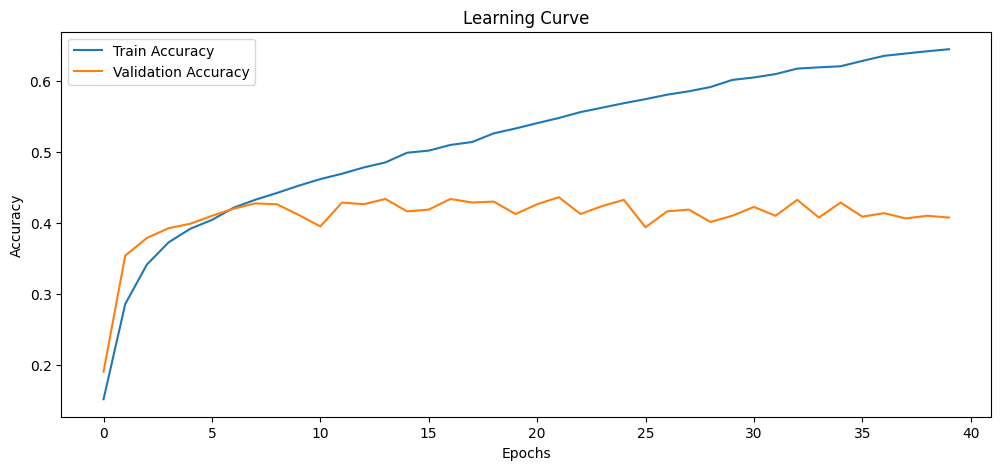

In [10]:
# Plot Learning Curve
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


Found 3200 images belonging to 8 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 556ms/step


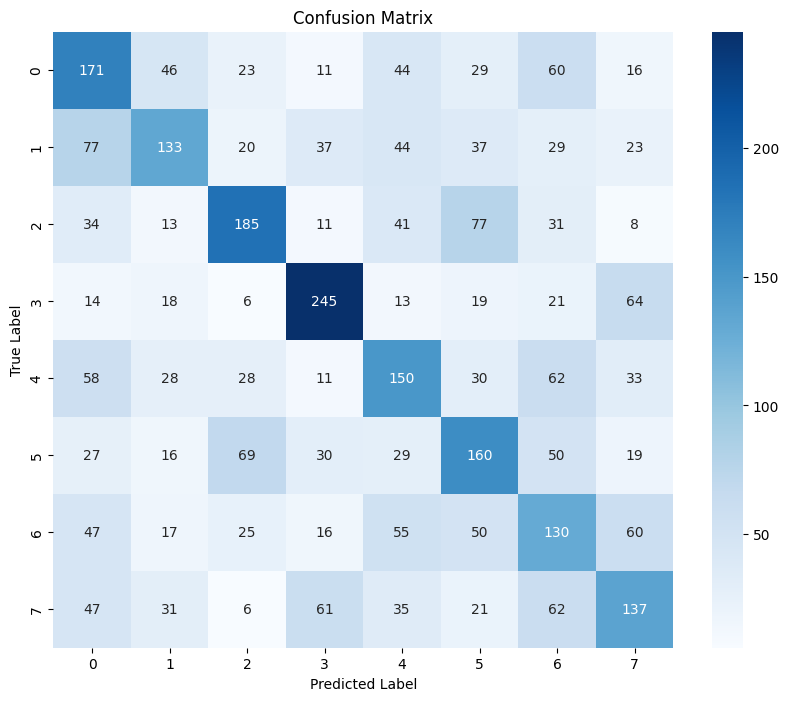

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.43      0.39       400
           1       0.44      0.33      0.38       400
           2       0.51      0.46      0.49       400
           3       0.58      0.61      0.60       400
           4       0.36      0.38      0.37       400
           5       0.38      0.40      0.39       400
           6       0.29      0.33      0.31       400
           7       0.38      0.34      0.36       400

    accuracy                           0.41      3200
   macro avg       0.41      0.41      0.41      3200
weighted avg       0.41      0.41      0.41      3200



In [11]:
# Confusion Matrix & Classification Report
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred))



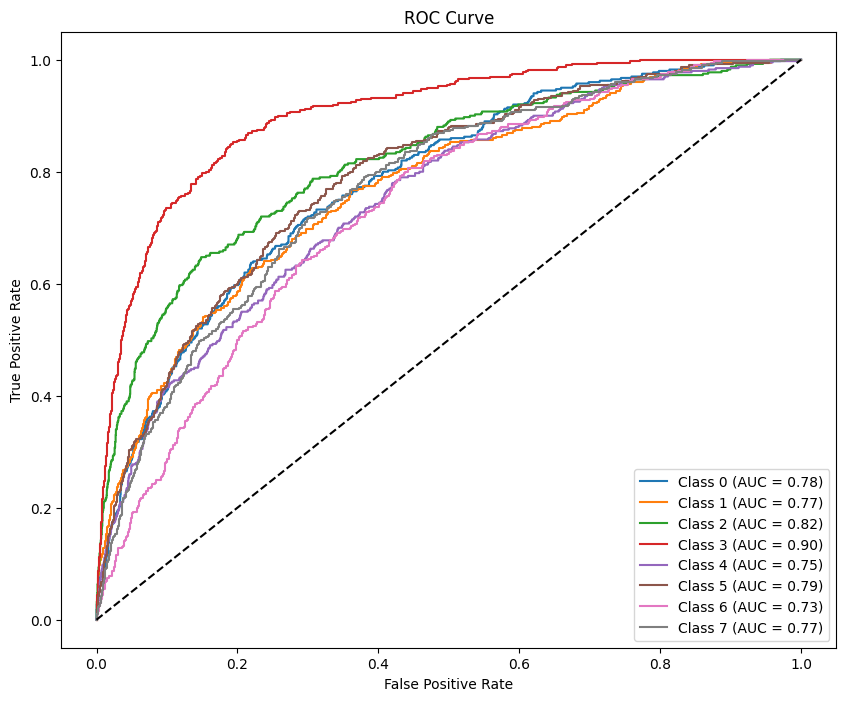

In [12]:
# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_generator.labels == i, Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
